<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/02133.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7.7 AdaDelta 算法

### 7.7.2 从零开始实现

In [0]:
!mkdir ../../data 

In [3]:
!git clone https://github.com/ShusenTang/Dive-into-DL-PyTorch.git

Cloning into 'Dive-into-DL-PyTorch'...
remote: Enumerating objects: 1692, done.
remote: Total 1692 (delta 0), reused 0 (delta 0), pack-reused 1692
Receiving objects: 100% (1692/1692), 25.29 MiB | 8.83 MiB/s, done.
Resolving deltas: 100% (975/975), done.


In [0]:
!cp Dive-into-DL-PyTorch/data/airfoil_self_noise.dat ../../data

In [0]:
%matplotlib inline 
import torch 
import d2l 


features, labels = d2l.get_data_ch7()

def init_adadelta_states():
    s_w, s_b = torch.zeros((features.shape[1], 1), dtype=torch.float32), torch.zeros(1, dtype=torch.float32)
    delta_w, delta_b = torch.zeros((features.shape[1], 1), dtype=torch.float32), torch.zeros(1, dtype=torch.float32)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5 
    for p, (s, delta) in zip(params, states):
        s[:] = rho * s + (1 - rho) * (p.grad.data**2)
        g = p.grad.data * torch.sqrt((delta + eps) / (s + eps))
        p.data -= g 
        delta[:] = rho * delta + (1 - rho) * g * g

loss: 0.243657, 0.076083 sec per epoch


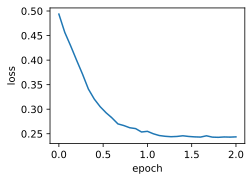

In [14]:
d2l.train_ch7(adadelta, init_adadelta_states(), {'rho': 0.9}, features, labels)

### 7.7.3 简洁实现

loss: 0.309208, 0.087438 sec per epoch


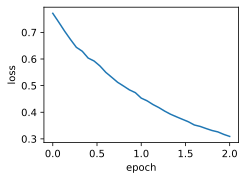

In [15]:
d2l.train_pytorch_ch7(torch.optim.Adadelta, {'rho': 0.9}, features, labels)